In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DigiPythonTools import DataUtility
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler


In [12]:
min_sql = DataUtility()
# query = 'SELECT MIN(TagDateTime) AS mintime, MAX(TagDateTime) AS maxtime  FROM DigiProcessInfo.tblLpFmRtFceTrendData '
query_march = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2024-03-%';
"""

query_december = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2023-12-%';
"""

query_november = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2023-11-%';
"""
march_df = min_sql.min_query(query_march)
december_df = min_sql.min_query(query_december)
november_df = min_sql.min_query(query_november)

	opening conn from file
	conn opened


C:\Users\sk5261\PycharmProjects\pythonProject4\.venv\lib\site-packages\DigiPythonTools\MinimumSQLUtility.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res_df = pd.read_sql_query(sql_str, self.conn)


In [14]:
#Zone1TempOutput
march_df = march_df.drop_duplicates(subset=['TagDateTime', 'TagName'])
november_df = november_df.drop_duplicates(subset=['TagDateTime', 'TagName'])

df_november = november_df.pivot(index='TagDateTime', columns='TagName', values='TagValue')
df_march = march_df.pivot(index='TagDateTime', columns='TagName', values='TagValue')



In [18]:
df_march = df_march.reset_index()
df_november = df_november.reset_index()

In [34]:
df_march_temp100 = df_march[df_march['RTFCE1_Zone1TempOutput'] == 100.0]
df_november_temp100 = df_november[df_november['RTFCE1_Zone1TempOutput'] == 100.0]

In [35]:
df_march_temp100 

TagName,index,TagDateTime,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
0,0,2024-03-03 05:00:00,117.378206,89864.185027,1.173707,0.1,0.75,0.5,85.197689,84.866944,...,96.817119,100.000000,0.0,1.2,0.0,1576.557397,9.0,1.0,100.0,1900.0
1,1,2024-03-03 05:05:00,117.868868,90240.435257,1.178962,0.1,0.75,0.5,84.396773,84.893530,...,96.817100,100.000000,0.0,1.2,0.0,1574.663227,9.0,1.0,100.0,1900.0
2,2,2024-03-03 05:10:00,117.595904,90030.026392,1.175771,0.1,0.75,0.5,84.796862,84.830065,...,96.817119,100.000000,0.0,1.2,0.0,1564.672723,9.0,1.0,100.0,1900.0
3,3,2024-03-03 05:15:00,117.263417,89776.617695,1.171803,0.1,0.75,0.5,84.510928,84.655248,...,96.817113,100.000000,0.0,1.2,0.0,1567.406697,9.0,1.0,100.0,1900.0
4,4,2024-03-03 05:20:00,117.802590,90187.367356,1.177923,0.1,0.75,0.5,85.105953,84.599869,...,96.756935,100.000000,0.0,1.2,0.0,1577.676933,9.0,1.0,100.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,4828,2024-03-19 23:20:00,15.272048,11694.528404,1.850369,0.1,0.75,0.5,18.352240,19.412805,...,99.305557,22.729204,0.0,1.2,0.0,1604.061003,9.0,1.0,100.0,1800.0
4829,4829,2024-03-19 23:25:00,15.704736,12112.956351,1.726231,0.1,0.75,0.5,20.265077,20.222608,...,98.925494,23.184573,0.0,1.2,0.0,1603.548793,9.0,1.0,100.0,1800.0
4848,4848,2024-03-20 01:00:00,117.081720,89636.082347,1.170627,0.1,0.75,0.5,89.149067,88.425357,...,96.618168,100.000000,0.0,1.2,0.0,1645.026703,9.0,1.0,100.0,1800.0
4849,4849,2024-03-20 01:05:00,117.400572,89885.104376,1.173378,0.1,0.75,0.5,91.764485,91.432319,...,96.440876,100.000000,0.0,1.2,0.0,1681.448213,9.0,1.0,100.0,1800.0


In [39]:
# List of tags
tags = [
'RTFCE1_Zone1AirGasRatio',
'RTFCE1_Zone1TempDer',
'RTFCE1_Zone1AirValveGain',
'RTFCE1_Zone1GasValveDer',
'RTFCE1_Zone1RationSP',
'RTFCE1_Zone1AirValveSP',
'RTFCE1_Zone1GasFlow',
'RTFCE1_Zone1GasValveOut',
'RTFCE1_Zone1GasValvePos',
'RTFCE1_Zone1TempGain',
'RTFCE1_Zone1AirValveOut',
'RTFCE1_Zone1TempOutput',
'RTFCE1_Zone1GasValveGain',
'RTFCE1_Zone1TempInt',
'RTFCE1_Zone1AirFlowSCFH',
'RTFCE1_Zone1TempSP',
'RTFCE1_Zone1AirValveInt',
'RTFCE1_Zone1AirValvePos',
'RTFCE1_Zone1O2SensorFDBK',
'RTFCE1_Zone1GasValveInt',
'RTFCE1_Zone1GasFlowSCFH',
'RTFCE1_Zone1GasValveSP',
'RTFCE1_Zone1AirFlow',
'RTFCE1_Zone1TempFDBK',
'RTFCE1_Zone1AirValveDer',
]

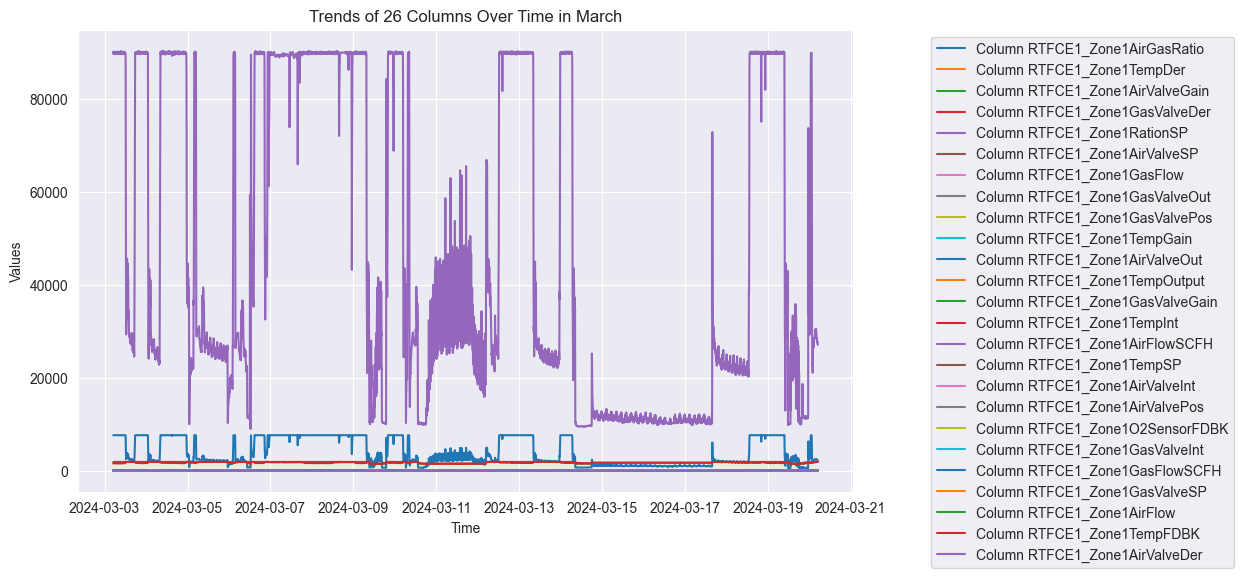

In [53]:
plt.figure(figsize=(10, 6))
for col in tags:
    plt.plot(df_march['TagDateTime'],df_march[col], label=f'Column {col}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Trends of 26 Columns Over Time in March')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

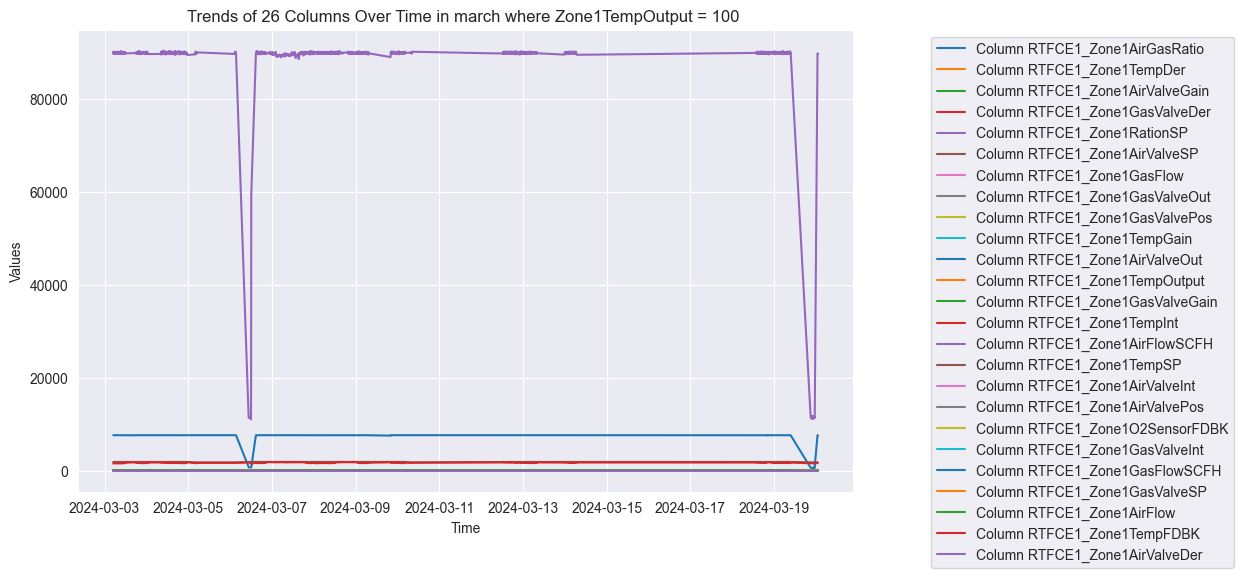

In [55]:
plt.figure(figsize=(10, 6))
for col in tags:
    plt.plot(df_march_temp100['TagDateTime'],df_march_temp100[col], label=f'Column {col}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Trends of 26 Columns Over Time in march where Zone1TempOutput = 100 ')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

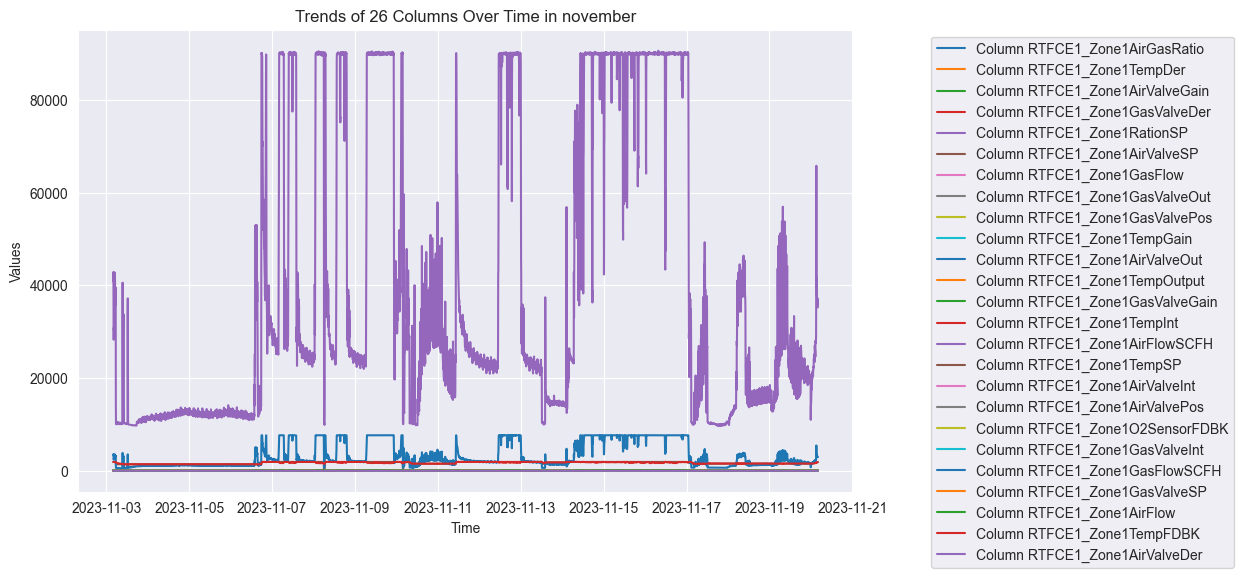

In [56]:
plt.figure(figsize=(10, 6))
for col in tags:
    plt.plot(df_november['TagDateTime'],df_november[col], label=f'Column {col}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Trends of 26 Columns Over Time in november')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

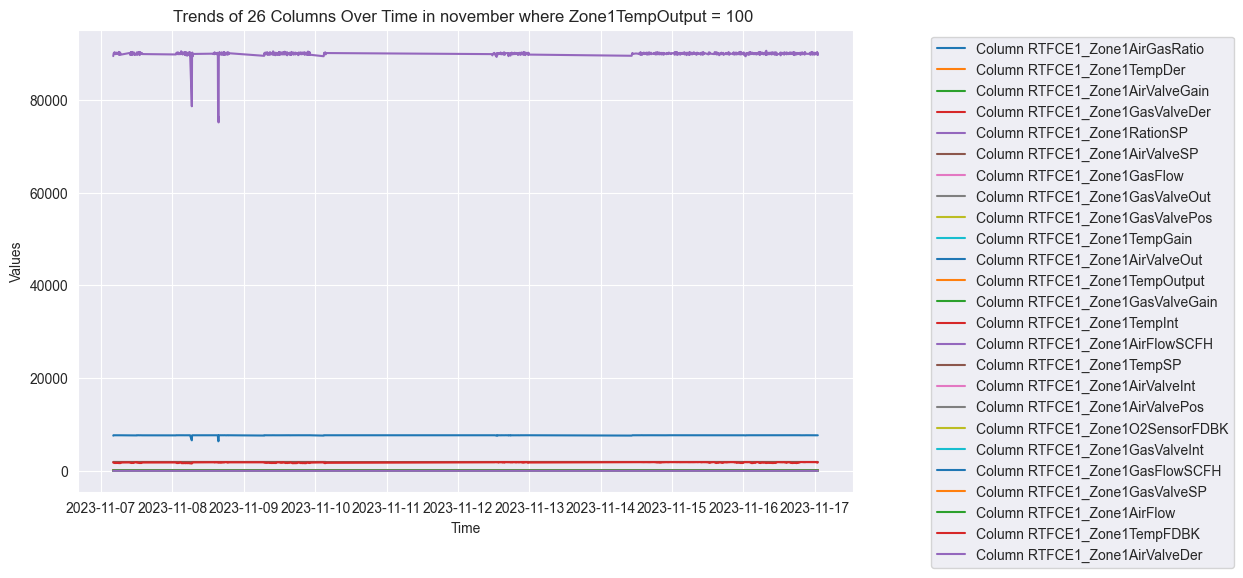

In [57]:
plt.figure(figsize=(10, 6))
for col in tags:
    plt.plot(df_november_temp100['TagDateTime'],df_november_temp100[col], label=f'Column {col}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Trends of 26 Columns Over Time in november where Zone1TempOutput = 100 ')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

Timestamp('2023-11-07 04:05:00') to Timestamp('2023-11-17 01:00:00')  and Timestamp('2024-03-03 05:00:00') to Timestamp('2024-03-20 01:10:00') 

In [70]:
df_november_temp100.to_csv('november_temp100.csv')
df_march_temp100.to_csv('march_temp100.csv')


In [71]:
#march4
#nov16
df_november_temp100

TagName,TagDateTime,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
1153,2023-11-07 04:05:00,116.827338,89448.505518,1.179219,0.1,0.75,0.5,92.089304,92.242004,120.0,...,96.523406,100.0,0.0,1.2,0.0,1793.620643,9.0,1.0,100.0,1900.0
1154,2023-11-07 04:10:00,117.182067,89718.485700,1.170531,0.1,0.75,0.5,94.483641,93.512056,120.0,...,98.003471,100.0,0.0,1.2,0.0,1732.621887,9.0,1.0,100.0,1900.0
1155,2023-11-07 04:15:00,117.671982,90087.043005,1.176680,0.1,0.75,0.5,93.828595,93.728115,120.0,...,97.612839,100.0,0.0,1.2,0.0,1712.060380,9.0,1.0,100.0,1900.0
1156,2023-11-07 04:20:00,117.553217,89997.402692,1.175466,0.1,0.75,0.5,94.752115,94.003863,120.0,...,97.569448,100.0,0.0,1.2,0.0,1702.300190,9.0,1.0,100.0,1900.0
1157,2023-11-07 04:25:00,117.841593,90222.400883,1.178318,0.1,0.75,0.5,93.633933,93.847356,120.0,...,97.327137,100.0,0.0,1.2,0.0,1695.805617,9.0,1.0,100.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,2023-11-17 00:40:00,117.450898,89917.383852,1.175252,0.1,0.75,0.5,96.490021,96.027712,120.0,...,97.330046,100.0,0.0,1.2,0.0,1832.842597,9.0,1.0,100.0,1900.0
3993,2023-11-17 00:45:00,117.957299,90307.791856,1.178433,0.1,0.75,0.5,94.459013,95.001178,120.0,...,97.538520,100.0,0.0,1.2,0.0,1761.151597,9.0,1.0,100.0,1900.0
3994,2023-11-17 00:50:00,117.230125,89752.541346,1.171892,0.1,0.75,0.5,94.409675,94.267750,120.0,...,97.309039,100.0,0.0,1.2,0.0,1736.001427,9.0,1.0,100.0,1900.0
3995,2023-11-17 00:55:00,117.764045,90161.985070,1.177984,0.1,0.75,0.5,95.057459,94.706555,120.0,...,97.327811,100.0,0.0,1.2,0.0,1755.842120,9.0,1.0,100.0,1900.0


In [87]:
df_march_04 = df_march_temp100.loc[(df_march_temp100['TagDateTime'] >= '2024-03-04') & (df_march_temp100['TagDateTime'] < '2024-03-05')]

In [88]:
df_march_04

TagName,index,TagDateTime,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
228,228,2024-03-04 00:00:00,117.310681,89814.437618,1.173557,0.1,0.75,0.5,89.163001,89.637424,...,97.135432,100.0,0.0,1.2,0.0,1677.391520,9.0,1.0,100.0,1900.0
229,229,2024-03-04 00:05:00,117.580133,90017.562024,1.175852,0.1,0.75,0.5,89.616944,89.224290,...,97.135422,100.0,0.0,1.2,0.0,1646.529053,9.0,1.0,100.0,1900.0
230,230,2024-03-04 00:10:00,117.689750,90104.936602,1.176466,0.1,0.75,0.5,90.171417,89.236059,...,97.135422,100.0,0.0,1.2,0.0,1656.774783,9.0,1.0,100.0,1900.0
231,231,2024-03-04 00:15:00,117.435727,89907.707432,1.174319,0.1,0.75,0.5,89.060284,88.427385,...,97.135468,100.0,0.0,1.2,0.0,1662.193743,9.0,1.0,100.0,1900.0
232,232,2024-03-04 00:20:00,117.900220,90263.630332,1.179315,0.1,0.75,0.5,87.379800,87.954537,...,97.135471,100.0,0.0,1.2,0.0,1666.545580,9.0,1.0,100.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,504,2024-03-04 23:00:00,117.504065,89963.225566,1.174740,0.1,0.75,0.5,86.531939,86.481410,...,97.391921,100.0,0.0,1.2,0.0,1712.698493,9.0,1.0,100.0,1900.0
505,505,2024-03-04 23:05:00,117.213393,89737.512566,1.172680,0.1,0.75,0.5,87.740122,87.523288,...,97.164352,100.0,0.0,1.2,0.0,1751.114397,9.0,1.0,100.0,1900.0
506,506,2024-03-04 23:10:00,117.565875,90005.699080,1.175205,0.1,0.75,0.5,89.148140,89.201849,...,97.833213,100.0,0.0,1.2,0.0,1761.366760,9.0,1.0,100.0,1900.0
507,507,2024-03-04 23:15:00,117.540030,89986.459409,1.176703,0.1,0.75,0.5,89.955338,89.760838,...,97.434747,100.0,0.0,1.2,0.0,1785.942633,9.0,1.0,100.0,1900.0


In [89]:
df_november_16 = df_november_temp100.loc[(df_november_temp100['TagDateTime'] >= '2023-11-16') & (df_november_temp100['TagDateTime'] < '2023-11-17')]

In [90]:
df_november_16

TagName,TagDateTime,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
3696,2023-11-16 00:00:00,117.647321,90071.605301,1.176580,0.1,0.75,0.5,89.219734,89.148691,120.0,...,96.997552,100.0,0.0,1.2,0.0,1727.565620,9.0,1.0,100.0,1900.0
3697,2023-11-16 00:05:00,117.869684,90238.370147,1.178325,0.1,0.75,0.5,87.959184,89.149988,120.0,...,96.903668,100.0,0.0,1.2,0.0,1769.814517,9.0,1.0,100.0,1900.0
3698,2023-11-16 00:10:00,117.324182,89823.900303,1.172765,0.1,0.75,0.5,88.963232,89.435975,120.0,...,96.903938,100.0,0.0,1.2,0.0,1825.086197,9.0,1.0,100.0,1900.0
3699,2023-11-16 00:15:00,117.180253,89714.825585,1.172711,0.1,0.75,0.5,91.300282,91.006964,120.0,...,96.903938,100.0,0.0,1.2,0.0,1858.688717,9.0,1.0,100.0,1900.0
3705,2023-11-16 00:45:00,116.767924,89400.586609,1.173640,0.1,0.75,0.5,90.269333,88.998012,120.0,...,96.458842,100.0,0.0,1.2,0.0,1830.469830,9.0,1.0,100.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,2023-11-16 23:35:00,117.385256,89868.732119,1.174229,0.1,0.75,0.5,96.527363,96.556756,120.0,...,97.238947,100.0,0.0,1.2,0.0,1869.140797,9.0,1.0,100.0,1900.0
3980,2023-11-16 23:40:00,117.803839,90188.926348,1.179066,0.1,0.75,0.5,96.927958,96.576640,120.0,...,97.326474,100.0,0.0,1.2,0.0,1872.031393,9.0,1.0,100.0,1900.0
3981,2023-11-16 23:45:00,117.584690,90023.523500,1.174768,0.1,0.75,0.5,96.101956,96.511691,120.0,...,97.473363,100.0,0.0,1.2,0.0,1851.651687,9.0,1.0,100.0,1900.0
3982,2023-11-16 23:50:00,117.247606,89763.365617,1.171927,0.1,0.75,0.5,95.870755,96.297557,120.0,...,97.527568,100.0,0.0,1.2,0.0,1855.345057,9.0,1.0,100.0,1900.0


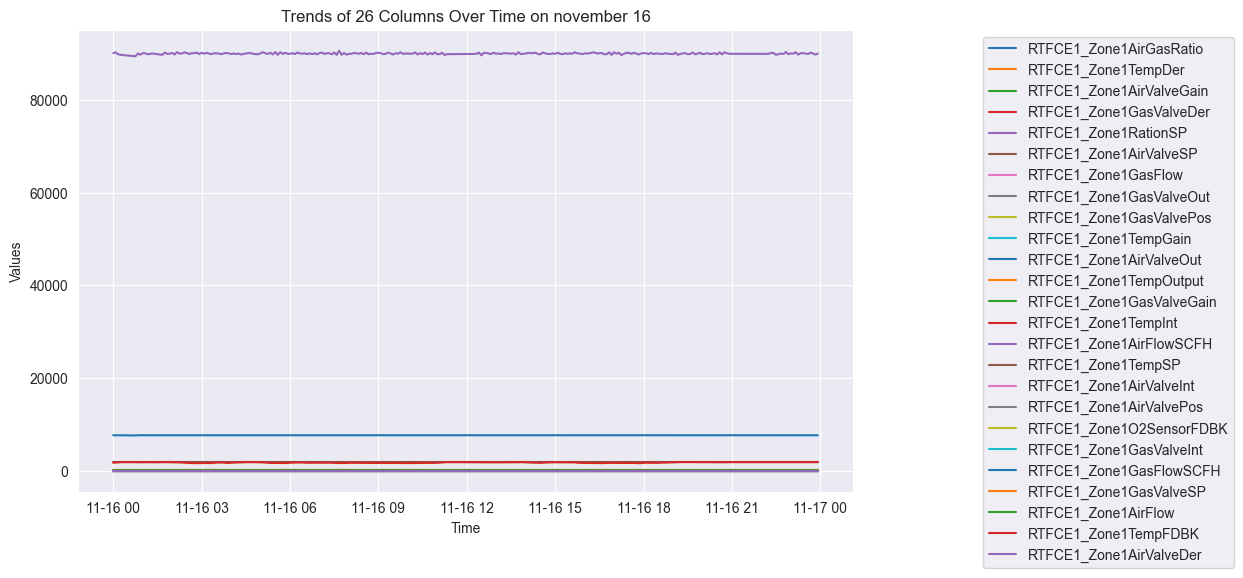

In [94]:
plt.figure(figsize=(10, 6))
for col in tags:
    plt.plot(df_november_16['TagDateTime'],df_november_16[col], label=f'{col}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Trends of 26 Columns Over Time on november 16')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

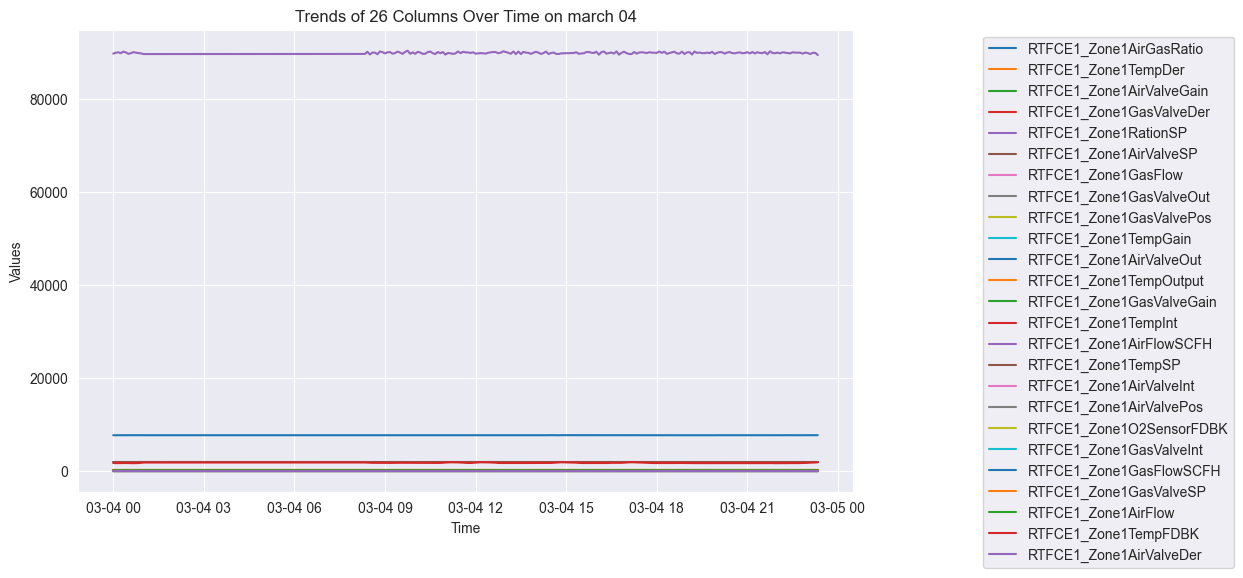

In [95]:
plt.figure(figsize=(10, 6))
for col in tags:
    plt.plot(df_march_04['TagDateTime'],df_march_04[col], label=f'{col}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Trends of 26 Columns Over Time on march 04')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

In [254]:
def calculate_pca(df):
    pca = PCA(n_components=2)
    pca_model = pca.fit(df)
    df_pca = pca_model.transform(df)
    df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
    return df_pca,pca_model



In [127]:
# Removing column named index
df_march = df_march.drop(['index'], axis=1)
df_november = df_november.drop(['index'], axis=1)
df_march_temp100 = df_march_temp100.drop(['index'], axis=1)
df_november_temp100 =  df_november_temp100 .drop(['index'], axis=1)

KeyError: "['index'] not found in axis"

In [97]:
df_march_temp100 = df_march_temp100.drop("TagDateTime", axis=1)
df_november_temp100 = df_november_temp100.drop("TagDateTime", axis=1)

In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca_march = pca.fit_transform(df_march_temp100)
df_pca_november = pca.fit_transform(df_november_temp100)

df_pca_march = pd.DataFrame(df_pca_march, columns=['PC1', 'PC2'])
df_pca_november = pd.DataFrame(df_pca_november, columns=['PC1', 'PC2'])

In [137]:
df_pca_march

,PC1,PC2
0,1995.911036,-19.554935
1,2370.458116,-55.041831
2,2161.117968,-36.098782
3,1909.110397,-9.137657
4,2317.806214,-47.592489
...,...,...
1784,-76489.005452,-25.027162
1785,-76043.524244,251.913236
1786,1768.774067,15.176018
1787,2017.089498,3.645022


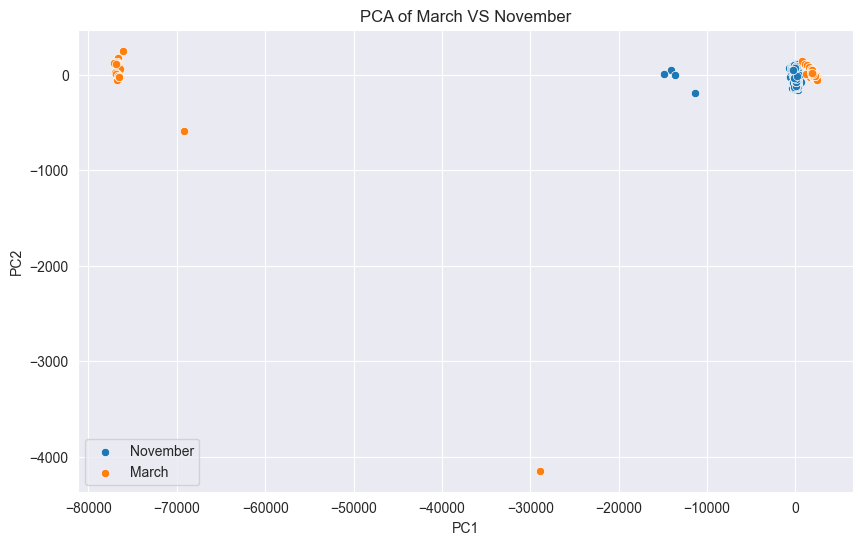

In [138]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_november, label='November')
sns.scatterplot(x='PC1', y='PC2', data=df_pca_march, label='March')
plt.title('PCA of March VS November')
plt.show()

In [139]:
df_march = df_march.drop("TagDateTime", axis=1)
df_november = df_november.drop("TagDateTime", axis=1)

KeyError: "['TagDateTime'] not found in axis"

In [140]:


pca = PCA(n_components=2)
df_pca_march = pca.fit_transform(df_march)




In [141]:
pca = PCA(n_components=2)
df_pca_november = pca.fit_transform(df_november)

In [142]:
df_pca_march = pd.DataFrame(df_pca_march, columns=['PC1', 'PC2'])
df_pca_november = pd.DataFrame(df_pca_november, columns=['PC1', 'PC2'])

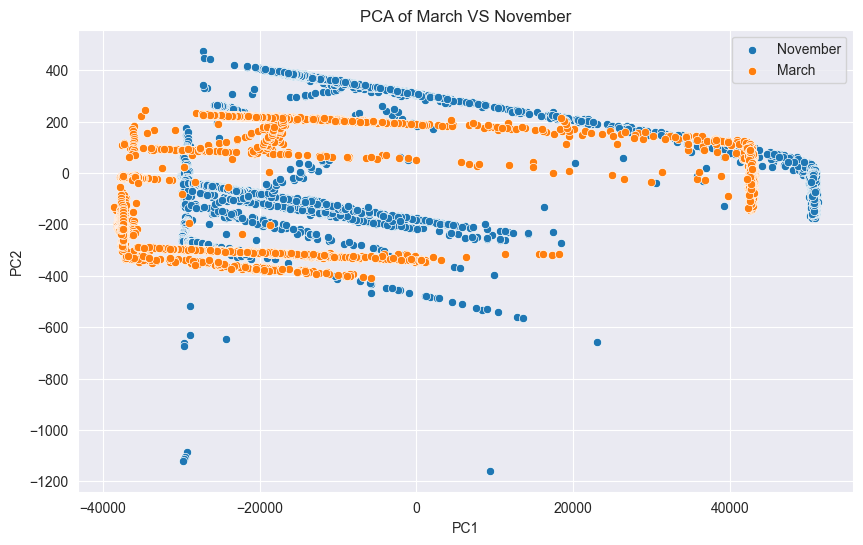

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_november, label='November')
sns.scatterplot(x='PC1', y='PC2', data=df_pca_march, label='March')
plt.title('PCA of March VS November')
plt.show()

In [167]:
# Removing the Tagdatetime and index

df_march_04 = df_march_04.drop(['TagDateTime', 'index'], axis=1)
df_november_16 = df_november_16.drop(['TagDateTime'], axis=1)

In [169]:
df_pca_november_1day = calculate_pca(df_november_16)
df_pca_march_1day = calculate_pca(df_march_04)

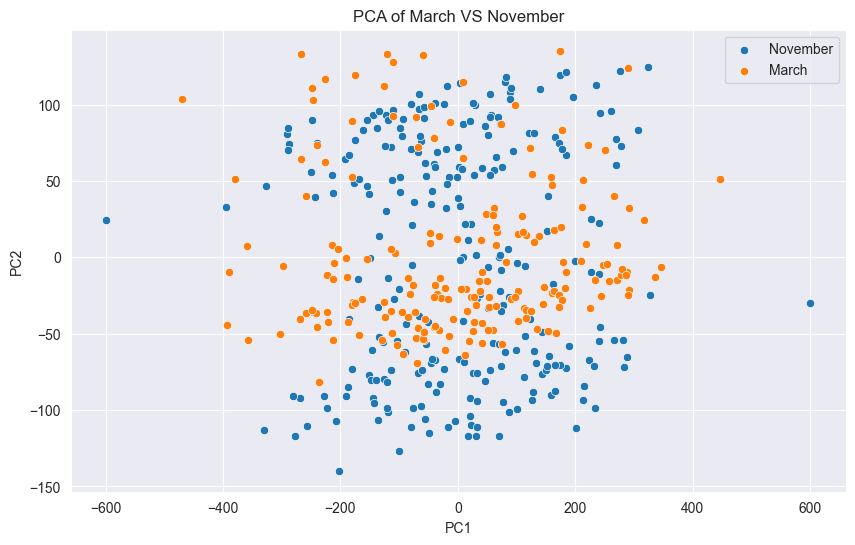

In [172]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_november_1day, label='November')
sns.scatterplot(x='PC1', y='PC2', data=df_pca_march_1day, label='March')
plt.title('PCA of March VS November')
plt.show()

In [171]:
df_pca_november_1day

,PC1,PC2
0,77.265122,-31.478099
1,240.678606,22.229392
2,-176.636903,48.385765
3,-287.822812,74.412646
4,-599.409405,24.373056
...,...,...
249,-135.020830,95.900652
250,184.177517,121.182085
251,20.641556,89.232429
252,-239.146400,74.735391


In [174]:
marchtmp100_desc

TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
count,1789.000000,1789.000000,1789.000000,1789.0,1789.00,1789.0,1789.000000,1789.000000,1789.000000,1789.000000,...,1789.000000,1789.000000,1789.0,1789.0,1789.0,1789.000000,1789.0,1789.0,1789.0,1789.000000
mean,114.788932,87876.976041,1.201102,0.1,0.75,0.5,89.303829,89.190854,117.387489,97.554095,...,96.530422,97.954737,0.0,1.2,0.0,1716.133679,9.0,1.0,100.0,1896.590274
std,16.390528,12547.062757,0.330893,0.0,0.00,0.0,12.215028,12.043903,15.739095,14.729321,...,2.960588,12.382577,0.0,0.0,0.0,75.405311,0.0,0.0,0.0,18.152977
min,14.403908,11023.812649,1.157557,0.1,0.75,0.5,15.324341,17.185739,20.910070,7.454074,...,9.693381,21.999099,0.0,1.2,0.0,1470.591660,9.0,1.0,100.0,1800.000000
25%,117.342037,89838.016742,1.173617,0.1,0.75,0.5,88.071701,88.194301,120.000000,99.957611,...,96.267357,100.000000,0.0,1.2,0.0,1658.857187,9.0,1.0,100.0,1900.000000
50%,117.524474,89976.267773,1.175375,0.1,0.75,0.5,89.885176,90.015972,120.000000,99.997096,...,96.469535,100.000000,0.0,1.2,0.0,1694.228617,9.0,1.0,100.0,1900.000000
75%,117.683224,90090.637612,1.177153,0.1,0.75,0.5,93.032637,92.996141,120.000000,100.038513,...,96.788213,100.000000,0.0,1.2,0.0,1781.897517,9.0,1.0,100.0,1900.000000
max,118.133772,90442.467421,12.211015,0.1,0.75,0.5,100.000000,98.624877,120.000000,100.172218,...,99.508071,100.000000,0.0,1.2,0.0,1877.897143,9.0,1.0,100.0,1900.000000


In [175]:
marchtmp100_desc[marchtmp100_desc.index == 'std']

TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
std,16.390528,12547.062757,0.330893,0.0,0.0,0.0,12.215028,12.043903,15.739095,14.729321,...,2.960588,12.382577,0.0,0.0,0.0,75.405311,0.0,0.0,0.0,18.152977


In [147]:
marchtmp100_desc = df_march_temp100.describe()

In [148]:
novtmp100_desc = df_november_temp100.describe()

In [154]:
marchtmp100_desc[marchtmp100_desc.index == 'std'].transpose()

,std
TagName,
RTFCE1_Zone1AirFlow,16.390528
RTFCE1_Zone1AirFlowSCFH,12547.062757
RTFCE1_Zone1AirGasRatio,0.330893
RTFCE1_Zone1AirValveDer,0.000000
RTFCE1_Zone1AirValveGain,0.000000
RTFCE1_Zone1AirValveInt,0.000000
RTFCE1_Zone1AirValveOut,12.215028
RTFCE1_Zone1AirValvePos,12.043903
RTFCE1_Zone1AirValveSP,15.739095


In [155]:
novtmp100_desc[novtmp100_desc.index == 'std'].transpose()

,std
TagName,
RTFCE1_Zone1AirFlow,1.089877
RTFCE1_Zone1AirFlowSCFH,833.412103
RTFCE1_Zone1AirGasRatio,0.003788
RTFCE1_Zone1AirValveDer,0.000000
RTFCE1_Zone1AirValveGain,0.000000
RTFCE1_Zone1AirValveInt,0.000000
RTFCE1_Zone1AirValveOut,3.240914
RTFCE1_Zone1AirValvePos,3.234368
RTFCE1_Zone1AirValveSP,0.799978


In [185]:
scaler = StandardScaler()

In [191]:
df_march_scaled = scaler.fit_transform(df_pca_march_1day)
df_november_scaled = scaler.fit_transform(df_pca_november_1day)
df_november_scaled 

array([[ 4.96390414e-01, -4.15881623e-01],
       [ 1.54624170e+00,  2.93689764e-01],
       [-1.13480525e+00,  6.39261927e-01],
       [-1.84912004e+00,  9.83123280e-01],
       [-3.85091070e+00,  3.22011380e-01],
       [-9.89203498e-02,  6.95960756e-01],
       [-1.55993795e+00,  5.17867081e-01],
       [ 3.25309029e-01,  1.05375932e+00],
       [ 3.63158493e-01,  1.22856399e+00],
       [-1.12512669e+00,  1.01846240e+00],
       [-4.30318656e-01,  9.12634224e-01],
       [ 3.00217831e-03,  9.52298132e-01],
       [-1.86351754e+00,  1.06691361e+00],
       [ 1.25535782e+00,  1.38833137e+00],
       [-5.13295896e-01,  9.35303319e-01],
       [-4.01396383e-01,  1.00451924e+00],
       [ 7.76006642e-01,  1.07343822e+00],
       [-1.37209476e+00,  7.07662738e-01],
       [ 1.97299398e+00,  1.09731134e+00],
       [-2.80851093e-01,  5.69721805e-01],
       [ 1.49489268e-01,  2.86068823e-01],
       [ 1.45358985e+00, -1.27122844e-01],
       [ 8.28431346e-01, -8.08394321e-01],
       [-7.

In [192]:
df_march_scaled  = pd.DataFrame(df_march_scaled , columns=df_pca_march_1day.columns)
df_november_scaled  = pd.DataFrame(df_november_scaled , columns=df_pca_november_1day.columns)

In [193]:
df_november_scaled

,PC1,PC2
0,0.496390,-0.415882
1,1.546242,0.293690
2,-1.134805,0.639262
3,-1.849120,0.983123
4,-3.850911,0.322011
...,...,...
249,-0.867442,1.267018
250,1.183250,1.601031
251,0.132612,1.178919
252,-1.536398,0.987387


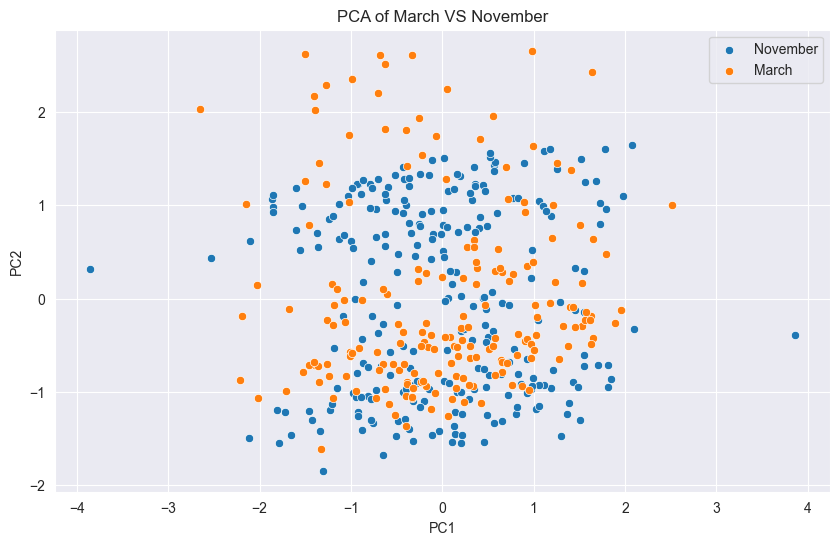

In [194]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_november_scaled, label='November')
sns.scatterplot(x='PC1', y='PC2', data=df_march_scaled, label='March')
plt.title('PCA of March VS November')
plt.show()

In [240]:
# Scaling the df
# scaler = StandardScaler()
# df_march_scaled = scaler.fit_transform(df_march_temp100)
# scaler = StandardScaler()
# df_november_scaled = scaler.fit_transform(df_november_temp100)
df_march_scaled = (df_march_temp100 - df_march_temp100.min())/(df_march_temp100.max() - df_march_temp100.min())
df_november_scaled =(df_november_temp100 - df_november_temp100.min())/(df_november_temp100.max() - df_november_temp100.min()) 

In [241]:
# Converting the scaled df back to pandas dataframe

df_march_scaled = pd.DataFrame(df_march_scaled , columns=df_march_temp100.columns)
df_november_scaled = pd.DataFrame(df_november_scaled ,columns=df_november_temp100.columns)

In [228]:
df_describe_march_scaled = df_march_scaled.describe()
df_describe_november_scaled = df_november_scaled.describe()

In [229]:
df_describe_march_scaled.transpose()

,count,mean,std,min,25%,50%,75%,max
TagName,,,,,,,,
RTFCE1_Zone1AirFlow,1789.0,0.967754,0.158012,0.0,0.992367,0.994126,0.995657,1.0
RTFCE1_Zone1AirFlowSCFH,1789.0,0.967697,0.157986,0.0,0.992389,0.994130,0.995570,1.0
RTFCE1_Zone1AirGasRatio,1789.0,0.003939,0.029936,0.0,0.001453,0.001612,0.001773,1.0
RTFCE1_Zone1AirValveDer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTFCE1_Zone1AirValveGain,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTFCE1_Zone1AirValveInt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTFCE1_Zone1AirValveOut,1789.0,0.873681,0.144257,0.0,0.859130,0.880546,0.917717,1.0
RTFCE1_Zone1AirValvePos,1789.0,0.884159,0.147888,0.0,0.871922,0.894290,0.930884,1.0
RTFCE1_Zone1AirValveSP,1789.0,0.973635,0.158836,0.0,1.000000,1.000000,1.000000,1.0


In [230]:
df_describe_november_scaled.transpose()

,count,mean,std,min,25%,50%,75%,max
TagName,,,,,,,,
RTFCE1_Zone1AirFlow,1098.0,0.958487,0.053429,0.0,0.954315,0.962138,0.969191,1.0
RTFCE1_Zone1AirFlowSCFH,1098.0,0.958134,0.053932,0.0,0.953878,0.961778,0.968886,1.0
RTFCE1_Zone1AirGasRatio,1098.0,0.647976,0.029019,0.0,0.635749,0.648518,0.659715,1.0
RTFCE1_Zone1AirValveDer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTFCE1_Zone1AirValveGain,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTFCE1_Zone1AirValveInt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTFCE1_Zone1AirValveOut,1098.0,0.695284,0.132314,0.0,0.576316,0.726864,0.808307,1.0
RTFCE1_Zone1AirValvePos,1098.0,0.758330,0.138486,0.0,0.641091,0.790751,0.875745,1.0
RTFCE1_Zone1AirValveSP,1098.0,0.997168,0.048105,0.0,1.000000,1.000000,1.000000,1.0


In [243]:
df_november_scaled = df_november_scaled.dropna(axis=1)
df_march_scaled = df_march_scaled.dropna(axis=1)

In [232]:
df_november_scaled = calculate_pca(df_november_scaled)
df_march_scaled = calculate_pca(df_march_scaled)

TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
1153,0.926236,0.925887,0.675971,NaN,NaN,NaN,0.681423,0.749600,1.0,0.935910,...,0.894537,1.0,NaN,NaN,NaN,0.735467,NaN,NaN,NaN,1.0
1154,0.943625,0.943358,0.609414,NaN,NaN,NaN,0.779174,0.803980,1.0,0.996756,...,0.976384,1.0,NaN,NaN,NaN,0.544181,NaN,NaN,NaN,1.0
1155,0.967642,0.967208,0.656522,NaN,NaN,NaN,0.752431,0.813231,1.0,0.990545,...,0.954782,1.0,NaN,NaN,NaN,0.479703,NaN,NaN,NaN,1.0
1156,0.961820,0.961408,0.647221,NaN,NaN,NaN,0.790135,0.825037,1.0,0.990700,...,0.952383,1.0,NaN,NaN,NaN,0.449096,NaN,NaN,NaN,1.0
1157,0.975957,0.975968,0.669068,NaN,NaN,NaN,0.744484,0.818336,1.0,0.990867,...,0.938983,1.0,NaN,NaN,NaN,0.428729,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0.956804,0.956229,0.645580,NaN,NaN,NaN,0.861086,0.911693,1.0,0.986651,...,0.939144,1.0,NaN,NaN,NaN,0.858464,NaN,NaN,NaN,1.0
3993,0.981629,0.981494,0.669950,NaN,NaN,NaN,0.778168,0.867740,1.0,0.995999,...,0.950673,1.0,NaN,NaN,NaN,0.633648,NaN,NaN,NaN,1.0
3994,0.945981,0.945562,0.619845,NaN,NaN,NaN,0.776154,0.836336,1.0,0.992413,...,0.937982,1.0,NaN,NaN,NaN,0.554779,NaN,NaN,NaN,1.0
3995,0.972155,0.972058,0.666508,NaN,NaN,NaN,0.802601,0.855125,1.0,0.988640,...,0.939020,1.0,NaN,NaN,NaN,0.616998,NaN,NaN,NaN,1.0


In [245]:
df_november_scaled

TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,RTFCE1_Zone1GasFlowSCFH,RTFCE1_Zone1GasValveOut,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempSP
1153,0.926236,0.925887,0.675971,0.681423,0.749600,1.0,0.935910,0.936877,0.919264,0.894537,1.0,0.735467,1.0
1154,0.943625,0.943358,0.609414,0.779174,0.803980,1.0,0.996756,0.996749,0.972469,0.976384,1.0,0.544181,1.0
1155,0.967642,0.967208,0.656522,0.752431,0.813231,1.0,0.990545,0.990574,0.954682,0.954782,1.0,0.479703,1.0
1156,0.961820,0.961408,0.647221,0.790135,0.825037,1.0,0.990700,0.990798,0.938336,0.952383,1.0,0.449096,1.0
1157,0.975957,0.975968,0.669068,0.744484,0.818336,1.0,0.990867,0.990879,0.918824,0.938983,1.0,0.428729,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0.956804,0.956229,0.645580,0.861086,0.911693,1.0,0.986651,0.986711,0.951794,0.939144,1.0,0.858464,1.0
3993,0.981629,0.981494,0.669950,0.778168,0.867740,1.0,0.995999,0.995930,0.930778,0.950673,1.0,0.633648,1.0
3994,0.945981,0.945562,0.619845,0.776154,0.836336,1.0,0.992413,0.992600,0.930938,0.937982,1.0,0.554779,1.0
3995,0.972155,0.972058,0.666508,0.802601,0.855125,1.0,0.988640,0.988777,0.930133,0.939020,1.0,0.616998,1.0


In [246]:
df_march_scaled

TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,RTFCE1_Zone1GasFlowSCFH,RTFCE1_Zone1GasValveOut,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempSP
0,0.992716,0.992719,0.001461,0.825188,0.831065,1.000000,0.998212,0.998209,0.968733,0.970039,1.000000,0.260163,1.0
1,0.997446,0.997456,0.001936,0.815729,0.831391,1.000000,0.997896,0.997891,0.967503,0.970039,1.000000,0.255512,1.0
2,0.994815,0.994807,0.001648,0.820454,0.830612,1.000000,0.998313,0.998270,0.966033,0.970039,1.000000,0.230984,1.0
3,0.991609,0.991616,0.001289,0.817078,0.828465,1.000000,0.998911,0.998884,0.965662,0.970039,1.000000,0.237696,1.0
4,0.996807,0.996788,0.001842,0.824105,0.827785,1.000000,0.998231,0.998209,0.961590,0.969369,1.000000,0.262911,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,0.008369,0.008445,0.062678,0.035759,0.027346,0.010060,0.008585,0.008957,1.000000,0.997745,0.009360,0.327689,0.0
4829,0.012541,0.013714,0.051448,0.058349,0.037290,0.055767,0.053397,0.054303,0.968711,0.993514,0.015198,0.326431,0.0
4848,0.989858,0.989846,0.001182,0.871853,0.874759,1.000000,0.998322,0.998303,0.965112,0.967824,1.000000,0.428266,0.0
4849,0.992932,0.992982,0.001431,0.902740,0.911682,1.000000,0.998721,0.998691,0.959332,0.965850,1.000000,0.517687,0.0


In [247]:
df_march_scaled = calculate_pca(df_march_scaled)
df_november_scaled = calculate_pca(df_november_scaled)

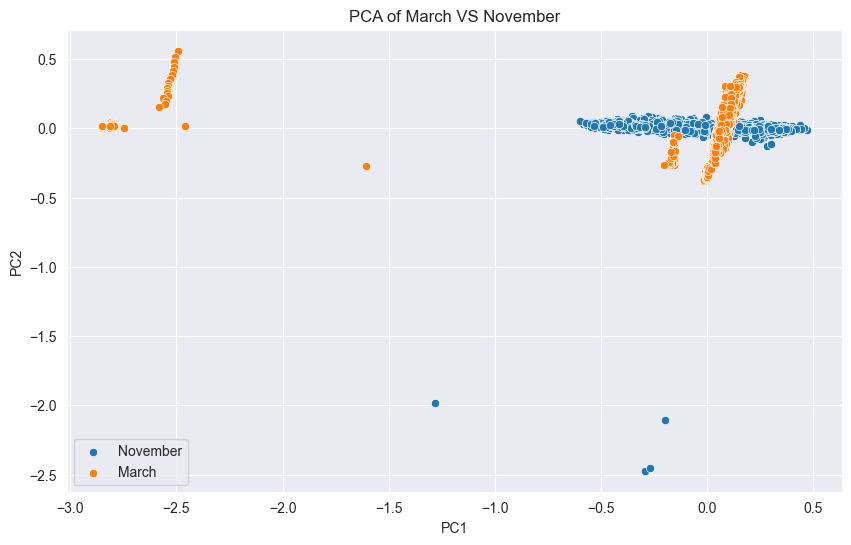

In [249]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_november_scaled, label='November')
sns.scatterplot(x='PC1', y='PC2', data=df_march_scaled, label='March')
plt.title('PCA of March VS November')
plt.show()

In [250]:
df_march_scaled = (df_march_04 - df_march_04.min())/(df_march_04.max() - df_march_04.min())
df_november_scaled =(df_november_16 - df_november_16.min())/(df_november_16.max() - df_november_16.min()) 

In [251]:
df_november_scaled = df_november_scaled.dropna(axis=1)
df_march_scaled = df_march_scaled.dropna(axis=1)

In [252]:
df_november_scaled,nov_pca = calculate_pca(df_november_scaled)
df_march_scaled,march_pca = calculate_pca(df_march_scaled)

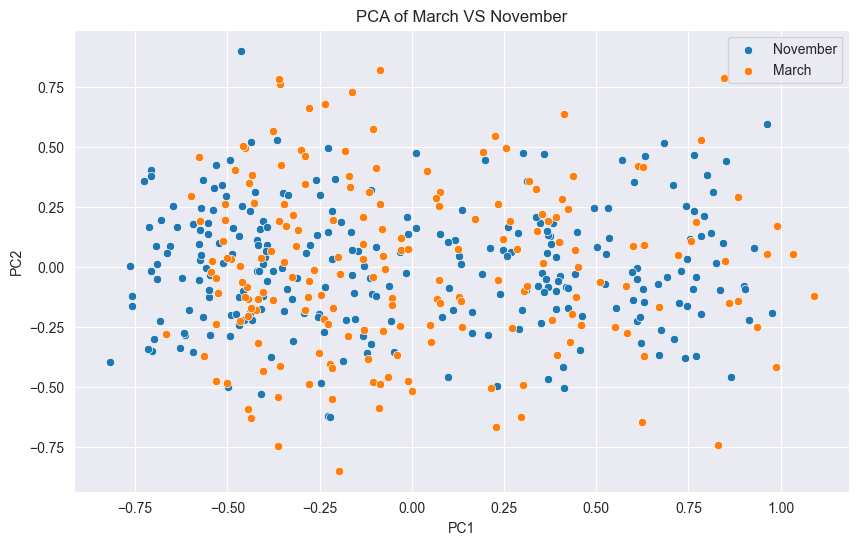

In [253]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_november_scaled, label='November')
sns.scatterplot(x='PC1', y='PC2', data=df_march_scaled, label='March')
plt.title('PCA of March VS November')
plt.show()

In [262]:
# Concatenate the dfs
df_march_temp100['months'] = 'march'
df_november_temp100['months'] = 'november'




In [269]:
df_concat = pd.concat([df_march_temp100, df_november_temp100], axis=0)

In [270]:
df_concat

TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,...,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP,months
0,117.378206,89864.185027,1.173707,0.1,0.75,0.5,85.197689,84.866944,120.0,100.006470,...,100.0,0.0,1.2,0.0,1576.557397,9.0,1.0,100.0,1900.0,march
1,117.868868,90240.435257,1.178962,0.1,0.75,0.5,84.396773,84.893530,120.0,99.977112,...,100.0,0.0,1.2,0.0,1574.663227,9.0,1.0,100.0,1900.0,march
2,117.595904,90030.026392,1.175771,0.1,0.75,0.5,84.796862,84.830065,120.0,100.015814,...,100.0,0.0,1.2,0.0,1564.672723,9.0,1.0,100.0,1900.0,march
3,117.263417,89776.617695,1.171803,0.1,0.75,0.5,84.510928,84.655248,120.0,100.071206,...,100.0,0.0,1.2,0.0,1567.406697,9.0,1.0,100.0,1900.0,march
4,117.802590,90187.367356,1.177923,0.1,0.75,0.5,85.105953,84.599869,120.0,100.008234,...,100.0,0.0,1.2,0.0,1577.676933,9.0,1.0,100.0,1900.0,march
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,117.450898,89917.383852,1.175252,0.1,0.75,0.5,96.490021,96.027712,120.0,99.937292,...,100.0,0.0,1.2,0.0,1832.842597,9.0,1.0,100.0,1900.0,november
3993,117.957299,90307.791856,1.178433,0.1,0.75,0.5,94.459013,95.001178,120.0,100.096866,...,100.0,0.0,1.2,0.0,1761.151597,9.0,1.0,100.0,1900.0,november
3994,117.230125,89752.541346,1.171892,0.1,0.75,0.5,94.409675,94.267750,120.0,100.035648,...,100.0,0.0,1.2,0.0,1736.001427,9.0,1.0,100.0,1900.0,november
3995,117.764045,90161.985070,1.177984,0.1,0.75,0.5,95.057459,94.706555,120.0,99.971241,...,100.0,0.0,1.2,0.0,1755.842120,9.0,1.0,100.0,1900.0,november


In [271]:
months = df_concat['months']
months

0          march
1          march
2          march
3          march
4          march
          ...   
3992    november
3993    november
3994    november
3995    november
3996    november
Name: months, Length: 2887, dtype: object

In [274]:
df_concat = df_concat.drop('months', axis = 1)

In [276]:
# Normalization of the concatenated dataframe
df_concat_scaled = (df_concat - df_concat.min())/(df_concat.max() - df_concat.min())


In [278]:
# Removing the na columns
df_concat_scaled = df_concat_scaled.dropna(axis=1)

In [279]:
# Creating the pca of concat df
df_concat_pca, concat_model = calculate_pca(df_concat_scaled)

In [292]:
df_concat_pca['months'] = months

ValueError: cannot reindex on an axis with duplicate labels

In [285]:
type(months)

pandas.core.series.Series

In [291]:
months.reset_index(drop=True)

0          march
1          march
2          march
3          march
4          march
          ...   
2882    november
2883    november
2884    november
2885    november
2886    november
Name: months, Length: 2887, dtype: object

In [288]:
df_concat_pca

,PC1,PC2
0,-0.071147,-0.394626
1,-0.071832,-0.400956
2,-0.076366,-0.423483
3,-0.078720,-0.417026
4,-0.069324,-0.393407
...,...,...
2882,0.124401,0.231323
2883,0.086784,0.058429
2884,0.067771,0.000307
2885,0.083381,0.047024


In [293]:
months

0          march
1          march
2          march
3          march
4          march
          ...   
3992    november
3993    november
3994    november
3995    november
3996    november
Name: months, Length: 2887, dtype: object

In [295]:
months_list = months.tolist()
months_list

['march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',
 'march',


In [296]:
df_concat_pca['months'] = months_list

In [297]:
df_concat_pca

,PC1,PC2,months
0,-0.071147,-0.394626,march
1,-0.071832,-0.400956,march
2,-0.076366,-0.423483,march
3,-0.078720,-0.417026,march
4,-0.069324,-0.393407,march
...,...,...,...
2882,0.124401,0.231323,november
2883,0.086784,0.058429,november
2884,0.067771,0.000307,november
2885,0.083381,0.047024,november


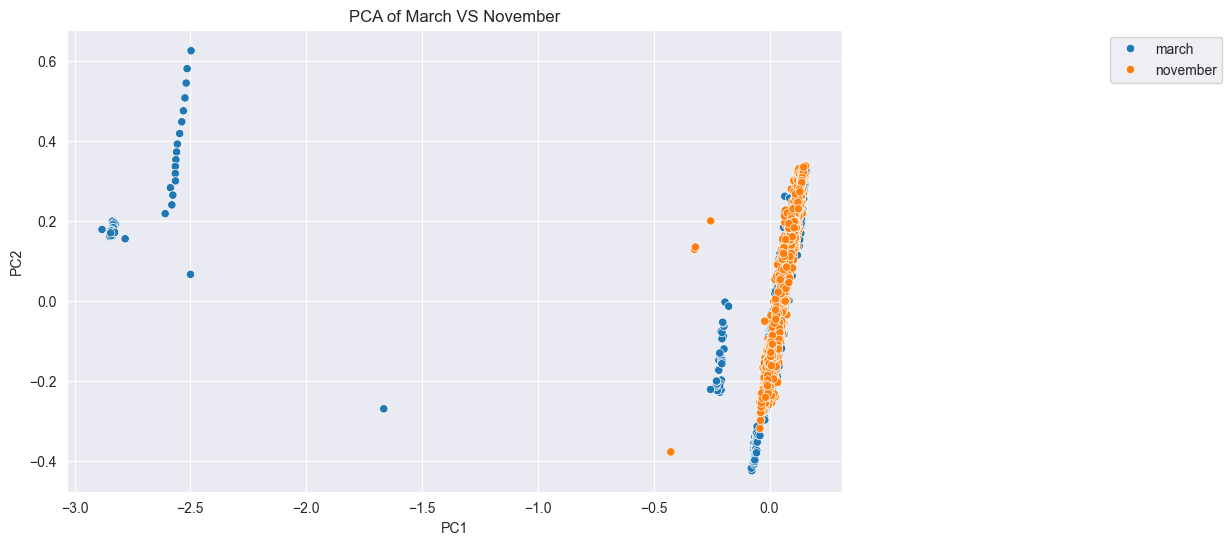

In [301]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_concat_pca, hue='months')
plt.title('PCA of March VS November')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()